# Machine Learning Example: Boston Housing Dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

## Useful Resources
 - [Scikit-Learn](http://scikit-learn.org/)
 - [Learning Data Science Boston Housing Example](https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef) 
 - [Python Data Analysis Library: pandas](https://pandas.pydata.org/)
 - [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
 - [Our Slides on ML](https://github.com/shivupa/QMMM_study_group/blob/master/04_Machine_Learning/ml_slides.pdf)   
 
## Setup
 1. Organize data
 2. Setup Classifier/Regressor
 3. Train, Test, Visualize!
 
## Organize Data
Data organization is one of the most important steps in machine learning. Unorganized data can lead to wasted compute time on improper data as well as make it more difficult for others to understand and replicate your method. For data organization we are going to use pandas (unfortunately not this one &#128060;).

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [5]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['PRICE'] = boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Machine Learning
1. Split data into training and testing sets
2. Train classifier/regressor
3. Test trained classifier/regressor on test set
4. Visualize

## Import Scikit-Learn

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

/Users/dakota/anaconda/envs/qmmm/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Split data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, train_size=0.9, test_size=0.1)

## Train Regressor

In [9]:
####################### Choose ML Model #######################
regr = LinearRegression()

####################### Train ML Model ########################
regr.fit(X_train, y_train)

###################### Predict Test Set #######################
predicted = regr.predict(X_test)

##################### Evaluate Prediciton #####################
mae = mean_absolute_error(predicted, y_test)
mse = mean_squared_error(predicted, y_test)
rmse = sqrt(mse)
print('MAE:', mae, '\tMSE:', mse, '\tRMSE:', rmse)

MAE: 4.053618667171584 	MSE: 39.8683130498042 	RMSE: 6.3141359701707565


## Plot Results

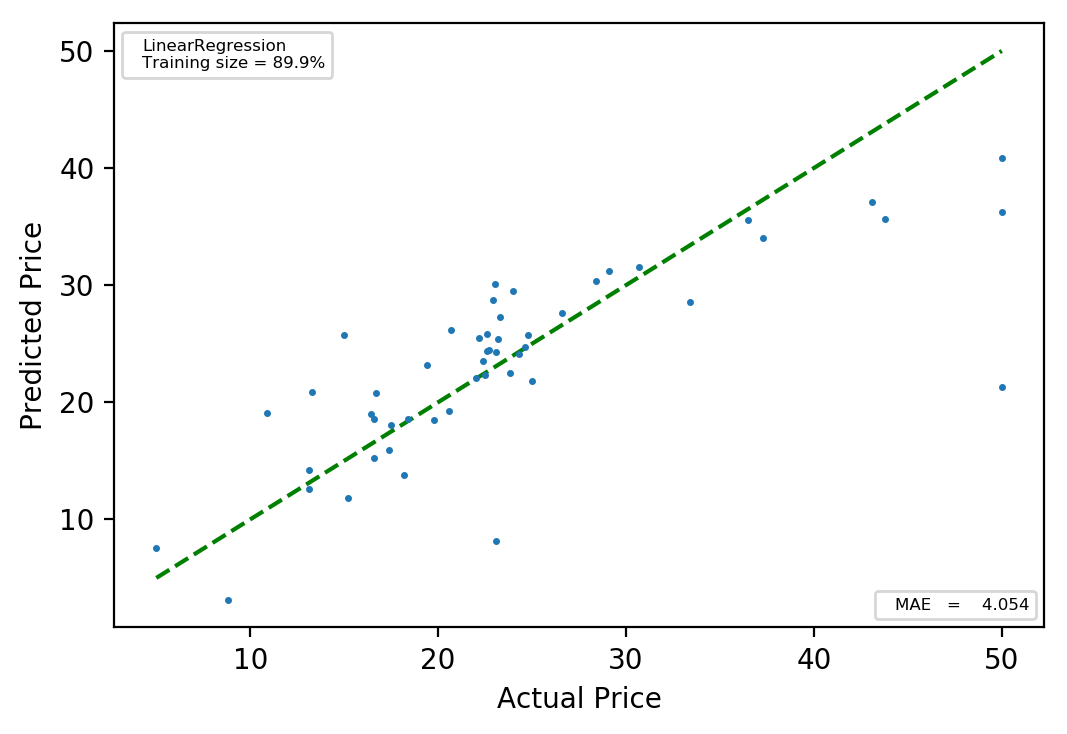

In [10]:
training_size = ('%0.1f' % (100 - (len(y_test)/len(boston.target) * 100)))
class_type = str(regr).split('(')[0]
label1 = ('MAE   = {}'.format('%8.3f' % mae))
label2 = (class_type + '\nTraining size = ' + training_size + '%')

plt.figure(dpi=200)
plt.plot([df_boston['PRICE'].min(), df_boston['PRICE'].max()], [df_boston['PRICE'].min(), df_boston['PRICE'].max()], ls="--", c="g")
plt.plot(y_test, predicted, 'o', markersize=1.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
legend1 = plt.legend([label1], loc='lower right', markerscale=0, fontsize=6, handlelength=0)
plt.legend([label2], loc='upper left', markerscale=0, fontsize=6, handlelength=0)
plt.gca().add_artist(legend1)
plt.show()